In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [3]:
# Directory path where the CSV files are located
directory = r'C:\Users\raulo\Desktop\Tracks_Ocean'

# List to store the individual DataFrames
dfs = []

# Get the list of file names in alphabetical order
file_names = sorted(os.listdir(directory))

# Iterate over the files in the directory
for filename in file_names:
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        #print(file_path)
        df = pd.read_csv(file_path, header = 2)
        df = df.drop(0)
        df.index = df.index -1    #Set the index rigth
        df = df.drop(columns='bodyparts')
        dfs.append(df)

C:\Users\raulo\AppData\Local\Temp\ipykernel_17072\1431235647.py:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header = 2)
C:\Users\raulo\AppData\Local\Temp\ipykernel_17072\1431235647.py:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header = 2)
C:\Users\raulo\AppData\Local\Temp\ipykernel_17072\1431235647.py:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header = 2)
C:\Users\raulo\AppD

In [4]:
# Directory path where the CSV files are located
directory = r"C:\Users\raulo\Desktop\Ocean_labels"

# List to store the individual DataFrames
dfs_labels = []

# Get the list of file names in alphabetical order
file_names = sorted(os.listdir(directory))

# Iterate over the files in the directory
for filename in file_names:
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        df = df.drop(columns='Unnamed: 0')
        #print(file_path)
        dfs_labels.append(df)

In [5]:
dfs_labels_single = []
for df in dfs_labels:
    # Convert DataFrame into a single-column DataFrame
    single_column_df = pd.DataFrame(df.idxmax(axis=1), columns=['Interaction'])
    dfs_labels_single.append(single_column_df)

In [6]:
# Create a list to store the labeled DataFrames
labeled_dfs = []

# Iterate over the DataFrames
for i in range(len(dfs)):
    # Add the labels DataFrame in front of each DataFrame
    labeled_df = pd.concat([dfs_labels_single[i], dfs[i]], axis=1)
    labeled_dfs.append(labeled_df)

# Concatenate the labeled DataFrames vertically
merged_df = pd.concat(labeled_dfs, ignore_index=True)

# Print the merged DataFrame
#print(merged_df)

In [7]:
interaction_counts = merged_df['Interaction'].value_counts()
print(interaction_counts)

background     487308
TS              37252
Pousing         36626
Int_Cleaner      1235
Dance             871
Int_Client         84
Run                19
Jolt                9
Name: Interaction, dtype: int64


# RandomForest (all Columns) with all backgrounds 500k+

In [39]:
X = merged_df.iloc[:, 1:43]  # Select columns 1 to 42 as features
y = merged_df.iloc[:, 0]     # Select column 0 as the target variable

In [40]:
X_imputed = imputer.fit_transform(X)

In [41]:
nan_indices = y.isnull()
if nan_indices.any():
    print("NaN values exist in the target variable.")

NaN values exist in the target variable.


In [42]:
X_nan = X_imputed[~nan_indices]
y_nan = y[~nan_indices]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_nan, y_nan, test_size=0.2, random_state=1999)

In [47]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9939208917208757


In [ ]:
#cv_scores = cross_val_score(model, X_train, y_train, cv=5)

In [ ]:
#print("Cross-Validation Accuracy Scores:", cv_scores)
#print("Average Accuracy:", cv_scores.mean())

In [49]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm = confusion_matrix(y_test, y_pred)

#print(cm)

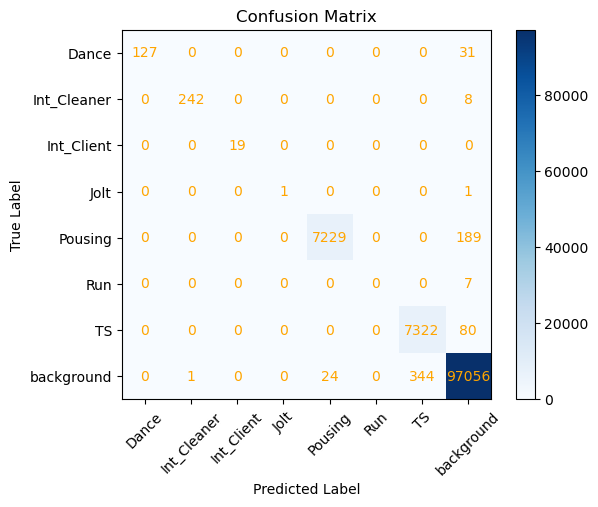

In [57]:
# Define the class labels
class_labels = np.sort(y_nan.unique())

# Create the confusion matrix
cm = np.array(cm)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels)

# Add labels to each cell
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

___
___
___

# RandomForest (all Columns) with 30k backgrounds

In [72]:
background_df = merged_df[merged_df['Interaction'] == 'background']
other_df = merged_df[merged_df['Interaction'] != 'background']

In [73]:
desired_background_samples = 30000

In [74]:
background_sample = background_df.sample(n=desired_background_samples, random_state=1999)

In [75]:
undersampled_df = pd.concat([background_sample, other_df], ignore_index=True)

In [76]:
interaction_counts_new = undersampled_df['Interaction'].value_counts()
print(interaction_counts_new)

TS             37252
Pousing        36626
background     30000
Int_Cleaner     1235
Dance            871
Int_Client        84
Run               19
Jolt               9
Name: Interaction, dtype: int64


In [77]:
X_new30000 = undersampled_df.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_new30000 = undersampled_df.iloc[:, 0]     # Select column 0 as the target variable

In [78]:
imputer = SimpleImputer(strategy='mean')

X_new30000_imputed = imputer.fit_transform(X_new30000)

In [79]:
nan_indices_1 = y_new30000.isnull()
if nan_indices_1.any():
    print("NaN values exist in the target variable.")

NaN values exist in the target variable.


In [80]:
X_new30000_nan = X_new30000_imputed[~nan_indices_1]
y_new30000_nan = y_new30000[~nan_indices_1]

In [81]:
X_train_new30000, X_test_new30000, y_train_new30000, y_test_new30000 = train_test_split(X_new30000_nan, y_new30000_nan, test_size=0.2, random_state=1999)

In [82]:
model_new30000 = RandomForestClassifier()
model_new30000.fit(X_train_new30000, y_train_new30000)

RandomForestClassifier()

In [83]:
y_pred = model.predict(X_test_new30000)
accuracy = accuracy_score(y_test_new30000, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9880301602262017


In [ ]:
#cv_scores = cross_val_score(model, X_train, y_train, cv=5)

In [ ]:
#print("Cross-Validation Accuracy Scores:", cv_scores)
#print("Average Accuracy:", cv_scores.mean())

In [84]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm = confusion_matrix(y_test_new30000, y_pred)

#print(cm)

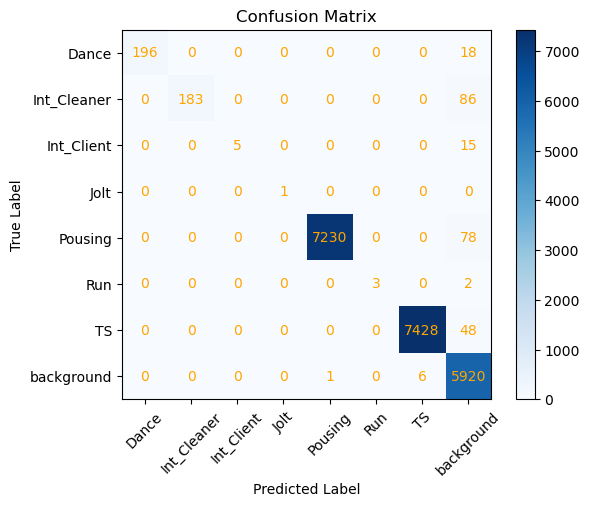

In [85]:
# Define the class labels
class_labels = np.sort(y_new30000_nan.unique())

# Create the confusion matrix
cm = np.array(cm)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels)

# Add labels to each cell
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()